## Задание 2

Имеются результаты A/B теста, в котором двум группам пользователей предлагались различные наборы акционных предложений. Известно, что ARPU в тестовой группе выше на 5%, чем в контрольной. При этом в контрольной группе 1928 игроков из 202103 оказались платящими, а в тестовой – 1805 из 202667.

Какой набор предложений можно считать лучшим? Какие метрики стоит проанализировать для принятия правильного решения и как?

In [70]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import mannwhitneyu
from tqdm.auto import tqdm
from scipy import stats
import scipy

In [3]:
df = pd.read_csv('Проект_1_Задание_2.csv', sep= ";")

Предобработка

In [4]:
df

,user_id,revenue,testgroup
0,1,0,b
1,2,0,a
2,3,0,a
3,4,0,b
4,5,0,b
...,...,...,...
404765,404766,0,a
404766,404767,0,b
404767,404768,231,a
404768,404769,0,a


In [5]:
df.isna().sum()

user_id      0
revenue      0
testgroup    0
dtype: int64

In [6]:
df.user_id.value_counts()

2047      1
312370    1
324660    1
326709    1
320566    1
         ..
164613    1
170758    1
168711    1
191240    1
2049      1
Name: user_id, Length: 404770, dtype: int64

In [7]:
df.revenue.describe()

count    404770.000000
mean         26.083435
std         681.652928
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       37433.000000
Name: revenue, dtype: float64

In [8]:
df.testgroup.unique()

array(['b', 'a'], dtype=object)

По результатам предобработки стоит отметить, что все id уникальные, пустых значений в данных нет, групп только 2.
Далее рассмотрим информацию по группам

In [9]:
# группа а
df.loc[df.testgroup == 'a']

,user_id,revenue,testgroup
1,2,0,a
2,3,0,a
9,10,0,a
10,11,0,a
11,12,0,a
...,...,...,...
404760,404761,0,a
404762,404763,0,a
404765,404766,0,a
404767,404768,231,a


In [10]:
# группа b
df.loc[df.testgroup == 'b']

,user_id,revenue,testgroup
0,1,0,b
3,4,0,b
4,5,0,b
5,6,0,b
6,7,0,b
...,...,...,...
404761,404762,0,b
404763,404764,0,b
404764,404765,0,b
404766,404767,0,b


In [11]:
# платящие пользователи группы а
df.loc[(df.testgroup == 'a') & (df.revenue>0)]

,user_id,revenue,testgroup
72,73,351,a
341,342,290,a
385,386,250,a
416,417,37324,a
712,713,255,a
...,...,...,...
404304,404305,360,a
404315,404316,262,a
404543,404544,369,a
404602,404603,251,a


In [12]:
# платящие пользователи группы b
df.loc[(df.testgroup == 'b') & (df.revenue>0)]

,user_id,revenue,testgroup
160,161,3797,b
377,378,3768,b
386,387,3527,b
551,552,2038,b
913,914,3902,b
...,...,...,...
403843,403844,3383,b
403994,403995,2793,b
404161,404162,2316,b
404193,404194,2998,b


In [13]:
# на основании условия задачи делаем вывод, что контрольная группа - группа а, тестовая группа - группа b
df_control = df.loc[df.testgroup == 'a']
df_test = df.loc[df.testgroup == 'b']

In [14]:
# ARPU контрольной группы
arpu_control = df_control.revenue.sum() / df_control.user_id.count()

In [15]:
# ARPU тестовой группы
arpu_test = df_test.revenue.sum() / df_test.user_id.count()

In [16]:
# ARPU тестовой группы на 5.26 % выше чем у контрольной группы
(arpu_test - arpu_control) / arpu_control * 100

5.263168360069894

In [17]:
# ARPPU контрольной группы
arppu_control = df_control.revenue.sum() / df_control.loc[df_control.revenue > 0].user_id.count()

In [18]:
# ARPPU тестовой группы
arppu_test = df_test.revenue.sum() / df_test.loc[df_test.revenue > 0].user_id.count()

In [19]:
# ARPPU тестовой группы на 12.75 % выше чем у контрольной группы
(arppu_test/arppu_control -1)* 100

12.749997227996346

Действительно, что в контрольной группе 1928 игроков из 202103 оказались платящими, а в тестовой – 1805 из 202667.
ARPU в тестовой группе выше на 5.26 %, чем в контрольной.
ARPPU в тестовой группе выше на 12.75 %, чем в контрольной.

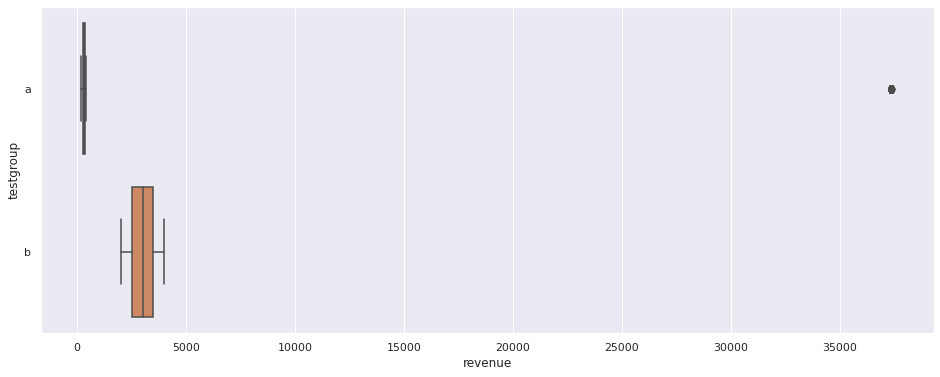

In [20]:
# Виузализируем разброс выручки для платящих пользователей по двум группам
sns.set(rc={'figure.figsize': (16, 6)})
sns.boxplot(data=df.loc[df.revenue >0], y='testgroup', x='revenue')

In [21]:
df_test.loc[df_test.revenue > 5000]

,user_id,revenue,testgroup


In [22]:
# среднее значение revenue для тестовой группы
df_test.revenue.mean()

26.75128659327863

In [23]:
# среднее значение revenue для контрольной группы
df_control.revenue.mean()

25.413719736965806

In [24]:
# среднее значение revenue для платящих пользователей тестовой группы
df_test.loc[df_test.revenue > 0].revenue.mean()

3003.6581717451522

In [25]:
# среднее значение revenue для платящих пользователей контрольной группы
df_control.loc[df_control.revenue > 0].revenue.mean()

2663.9984439834025

In [26]:
# медианное значение revenue для платящих пользователей тестовой группы
df_test.loc[df_test.revenue > 0].revenue.median()

3022.0

In [27]:
# медианное значение revenue для платящих пользователей контрольной группы
df_control.loc[df_control.revenue > 0].revenue.median()

311.0

In [28]:
# общая сумма выручки с пользователей, которые попали в категорию с высоким revenue по контрольной группе
df_control.loc[df_control.revenue > 37000].revenue.sum()

4590252

In [29]:
# количество пользователей в категории с высоким revenue
df_control.loc[df_control.revenue > 37000].user_id.count()

123

In [30]:
# процент пользователей в категории с высоким revenue от платящих по контрольной группе
df_control.loc[df_control.revenue > 37000].user_id.count() / df_control.loc[df_control.revenue > 0].user_id.count() * 100

6.379668049792531

In [31]:
# общая сумма выручки с пользователей, которые не попали в категорию с высоким revenue по контрольной группе
df_control.loc[df_control.revenue < 37000].revenue.sum()

545937

In [32]:
''' процент сумма выручки с пользователей, который попали в категорию с высоким revenue по контрольной группе
 от общей суммы выручки для контрольной группы'''
4590252/df_control.revenue.sum()

0.8937077665950377

In [33]:
df_control.loc[df_control.revenue > 0].revenue.quantile([0.05, 0.25, 0.5, 0.75, 0.90, 0.95])

0.05      211.00
0.25      257.00
0.50      311.00
0.75      361.00
0.90      393.30
0.95    37299.65
Name: revenue, dtype: float64

In [34]:
df_test.loc[df_test.revenue > 0].revenue.quantile([0.05, 0.25, 0.5, 0.75, 0.90, 0.95])

0.05    2094.0
0.25    2513.0
0.50    3022.0
0.75    3478.0
0.90    3795.8
0.95    3891.8
Name: revenue, dtype: float64

На основании вышепроведенных результатов, стоит отметить, что распределение выручки контрольной группы не является нормальным. Важно отметить, что 6.38 % процента от платящих пользователей (123 клиента), на долю которых приходится почти 90% выручки от всех платящих пользователей этой группы. Хотя распределение в тестовой группе более равномерное.


Используем метод bootstrap для анализа значений revenue в двух группах. 
Сформулируем гипотезы:

H0 - среднее значение выручки пользователя тестовой группы не отличается от среднего значения выручки пользователя контрольной группы

Н1 - среднее значегие выручки пользователя тестовой группы отличается от среднего значения выручки пользователя контрольной группы


Напишем функцию

In [53]:
def get_bootstrap(
    data_column_1,  # числовые значения первой выборки
    data_column_2,  # числовые значения второй выборки
    boot_it=1000,  # количество бутстрэп-подвыборок
    statistic=np.mean,  # интересующая нас статистика
    bootstrap_conf_level=0.95  # уровень значимости
):
    boot_data = []
    for i in tqdm(range(boot_it)):  # извлекаем подвыборки
        samples_1 = data_column_1.sample(
            len(data_column_1), 
            replace=True  # параметр возвращения
        ).values
        
        samples_2 = data_column_2.sample(
            len(data_column_1), 
            replace=True
        ).values
        
        boot_data.append(statistic(samples_1) - statistic(samples_2))  # mean() - применяем статистику
        
    pd_boot_data = pd.DataFrame(boot_data)
        
    left_quant = (1 - bootstrap_conf_level) / 2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    quants = pd_boot_data.quantile([left_quant, right_quant])
        
    p_1 = stats.norm.cdf(
        x=0, 
        loc=np.mean(boot_data), 
        scale=np.std(boot_data)
    )
    p_2 = stats.norm.cdf(
        x=0, 
        loc=-np.mean(boot_data), 
        scale=np.std(boot_data)
    )
    p_value = min(p_1, p_2) * 2
        
    # Визуализация
    _, _, bars = plt.hist(pd_boot_data[0], bins=50)
    for bar in bars:
        if bar.get_x() <= quants.iloc[0][0] or bar.get_x() >= quants.iloc[1][0]:
            bar.set_facecolor('red')
        else: 
            bar.set_facecolor('grey')
            bar.set_edgecolor('black')
    
    plt.style.use('ggplot')
    plt.vlines(quants, ymin=0, ymax=50, linestyle='--')
    plt.xlabel('boot_data')
    plt.ylabel('frequency')
    plt.title("Histogram of boot_data")
    plt.show()
       
    return {"boot_data": boot_data, 
            "quants": quants, 
            "p_value": p_value}

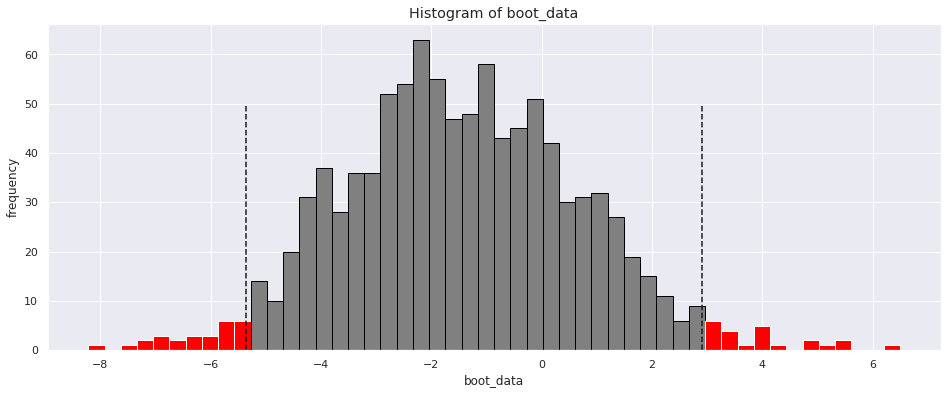

In [54]:
bootstrap_data = get_bootstrap(
    df_control.revenue,
    df_test.revenue)

нулевое значение лежит в доверительном интервале, следовательно нет оснований отклонять нулевую гипотезу для метрики ARPU 

Сформулируем гипотезы:

H0 - медианное значение выручки платящего пользователя тестовой группы не отличается от медианного значения выручки платящего пользователя контрольной группы

Н1 - медианное значегие выручки платящего пользователя тестовой группы отличается от медианного значения выручки платящего пользователя контрольной группы

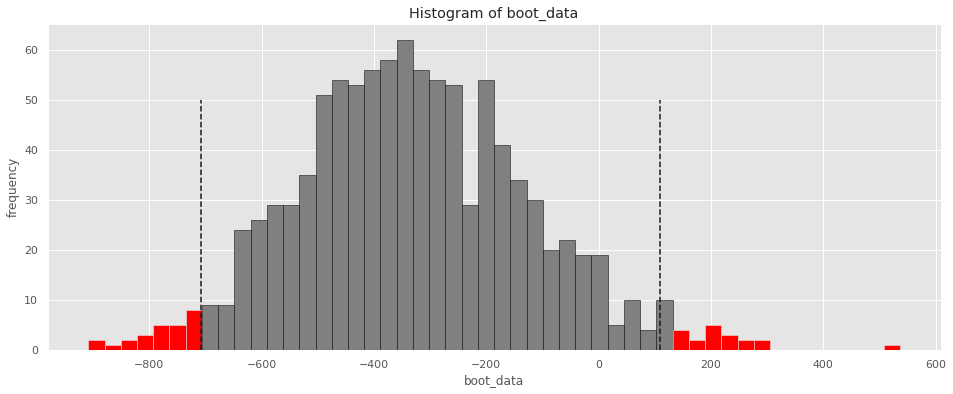

In [55]:
bootstrap_data_pay = get_bootstrap(
    df_control.loc[df_control.revenue > 0].revenue,
    df_test.loc[df_test.revenue > 0].revenue)

нулевое значение лежит в доверительном интервале, следовательно нет оснований отклонять нулевую гипотезу для метрики ARPPU

In [64]:
# Конверсия в тестовой и контрольной группах в процентах
cr_control = df_control.loc[df_control.revenue > 0].revenue.count() / df_control.revenue.count()
cr_test = df_test.loc[df_test.revenue > 0].revenue.count() / df_test.revenue.count()
(round(cr_test*100, 4), round(cr_control*100, 4))

(0.8906, 0.954)

Пользователи разбиваются на категории платящий и неплатящий, для оценки различий конверсий используем метод хи-квадрат

Нулевая гипотеза - статистически значимых различий между конверсиями двух групп нет.
Альтернативная - статистически значимые различия между конверсиями двух групп есть.

In [75]:
df['pay'] = df['revenue'].apply(lambda x: '1' if x > 0 else '0')
cross_df = df.groupby(['testgroup', 'pay'], as_index = False).agg({'user_id':'count'})
cross_df = cross_df.pivot(index = 'pay', columns = 'testgroup', values = 'user_id')

In [67]:
cross_df

testgroup,a,b
pay,,
0,200175,200862
1,1928,1805


In [77]:
scipy.stats.chi2_contingency(cross_df)[1]

0.03647561892312613

p = 0.036 < 0.05 следовательно, отклоняем нулевую гипотезу. Есть статистически значимые различия между конверсиями контрольной и тестовой группы

## Выводы

- Использован метод bootstrap на платящих пользователях для оценки ARPPU и на всех пользователях для оценки ARPU, значимых различий на имеющихся данных выявлено не было.

- Для оценки статистической значимости различий в группах лучше всего использовать метрику ARPPU, так как пользователей не совершавших покупку слишком много. По результатам теста подтвердилась нулевая гипотеза, о то что различий между группами не обнаружено.

- Стоит отметить, что в контрольной группе присутствует сегмент пользователей (6.38 % процента от платящих пользователей (123 клиента)), на долю которых приходится почти 90% выручки от всех платящих пользователей этой группы. Возможно это крупные корпоративные клиенты

- Также суммарный доход от пользователей на 285414 (5.6%) условной валюты больше чем у контрольной.

Можно сделать следующий вывод: 
- акционные предложения, использованные на тестовой группе, не влияют на среднюю выручку с пользователя
- конверсия в покупку в контрольной группе выше чем в тестовой, различия статистически значимы.
- на основе проведенных тестов делаем выбор в пользу контрольной группы, понимая ее особенность в распределении платежей


